In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# create a dataset
x, y = make_blobs(n_samples = 100, centers = 3, 
               cluster_std = 1, n_features = 2)

In [6]:
print(x.shape)
print(y.shape)

(100, 2)
(100,)


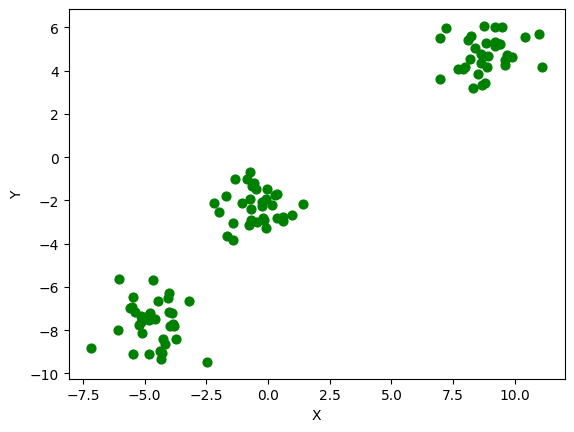

<Figure size 640x480 with 0 Axes>

In [7]:
plt.scatter(x[:, 0], x[:, 1], s = 40, color = 'g')
plt.xlabel("X")
plt.ylabel("Y")

plt.show()
plt.clf()


In [8]:
#KNN
#scale data 
#In knn we scale data because it is based on euclidean distance so it prevents one feature to dominate
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans_labels = kmeans.fit_predict(x_scaled)

centroids = kmeans.cluster_centers_
print(centroids)

[[-0.28777438 -0.09547372]
 [ 1.34046806  1.26658219]
 [-1.02173211 -1.13666411]]


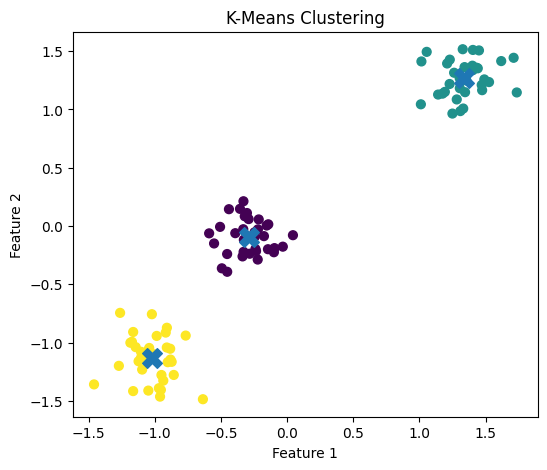

In [10]:
plt.figure(figsize=(6, 5))

plt.scatter(
    x_scaled[:, 0],
    x_scaled[:, 1],
    c=kmeans_labels,
    s=40
)

plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=200,
    marker='X'
)

plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# DBSCAN

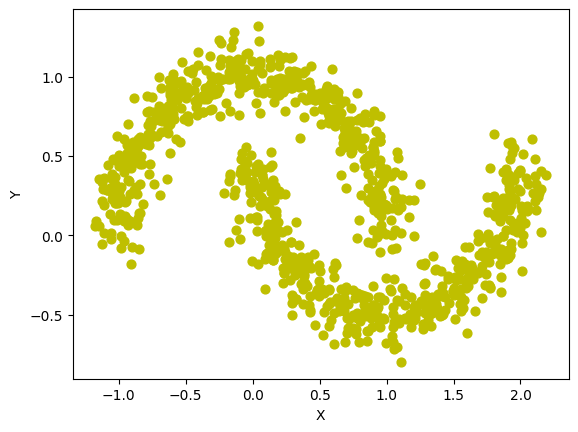

<Figure size 640x480 with 0 Axes>

In [14]:
# Creating Test DataSets using sklearn.datasets.make_moon
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt 
from matplotlib import style

x_moon, y_moon = make_moons(n_samples = 1000, noise = 0.1)
plt.scatter(x_moon[:, 0], x_moon[:, 1], s = 40, color ='y')
plt.xlabel("X")
plt.ylabel("Y")

plt.show()
plt.clf()

In [16]:
scaler = StandardScaler()
x_scaled_m = scaler.fit_transform(x_moon)

In [18]:
# first applying KNN & see results

kmeans = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans_labels_m = kmeans.fit_predict(x_scaled_m)

centroids_m = kmeans.cluster_centers_
print(centroids_m)


[[ 0.75430722 -0.79966179]
 [-0.72472655  0.76830251]]


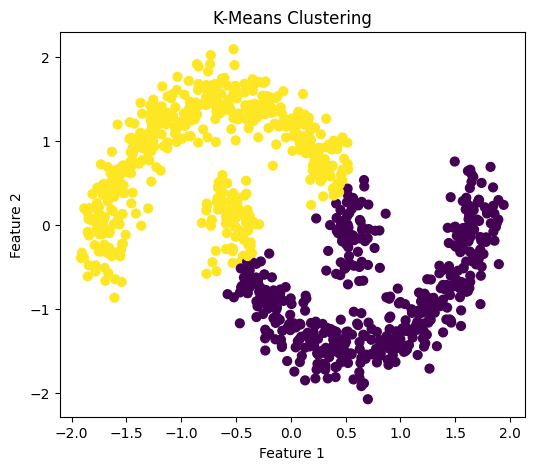

In [ ]:
plt.figure(figsize=(6, 5))

plt.scatter(
    x_scaled_m[:, 0],
    x_scaled_m[:, 1],
    c=kmeans_labels_m,
    s=40
)

plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [31]:
# Now use DBSCAN for this same dataset
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(
    eps=0.2,        # neighborhood radius
    min_samples=5   # minimum points to form a cluster
)

labels = dbscan.fit_predict(x_scaled_m)



In [32]:
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)

print("Clusters found:", n_clusters)


Clusters found: 2


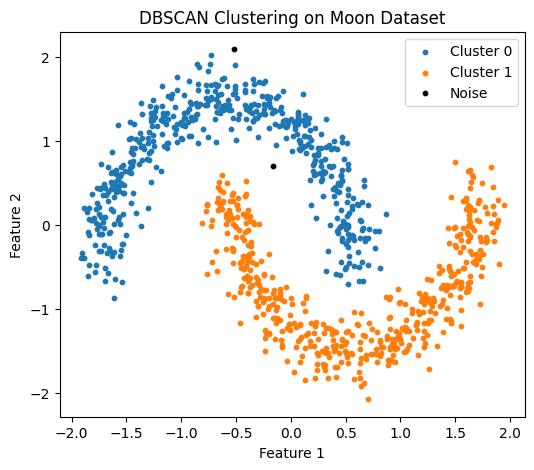

In [33]:
plt.figure(figsize=(6, 5))

for label in unique_labels:
    if label == -1:
        plt.scatter(
            x_scaled_m[labels == label, 0],
            x_scaled_m[labels == label, 1],
            c='black',
            s=10,
            label='Noise'
        )
    else:
        plt.scatter(
            x_scaled_m[labels == label, 0],
            x_scaled_m[labels == label, 1],
            s=10,
            label=f'Cluster {label}'
        )

plt.title("DBSCAN Clustering on Moon Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
